# CGIAR Eyes on the Ground Challenge - EDA

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport 
%matplotlib inline 

In [2]:
np.set_printoptions(suppress=True, precision=2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Importing the dataset

In [3]:
dataset = pd.read_csv('data/data.csv')

## Identify the data types

In [4]:
numeric_features = ['extent']
categorical_features = ['growth_stage', 'damage', 'season']

## Data Visualization

In [5]:
profile = ProfileReport(dataset)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Numerical Features

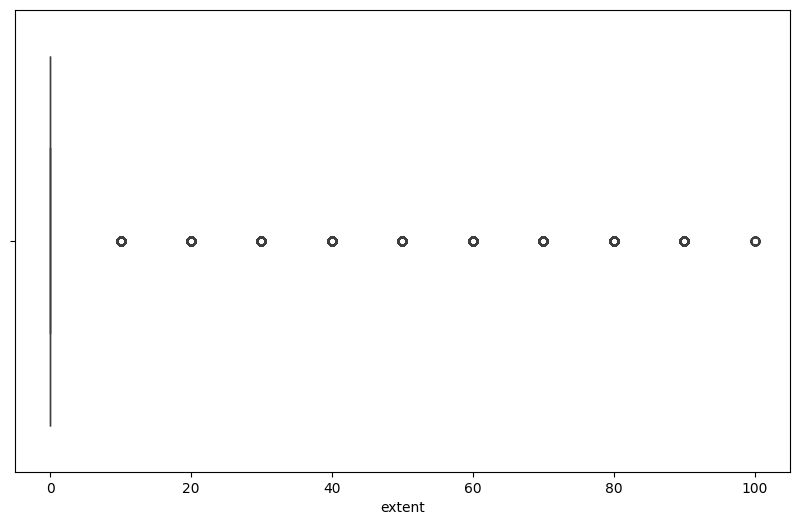

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['extent'])
plt.show()

### Categorical Features

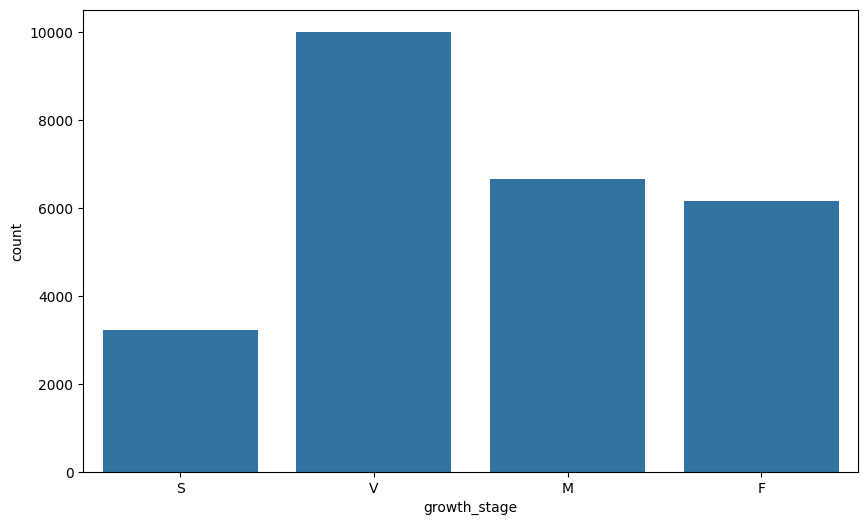

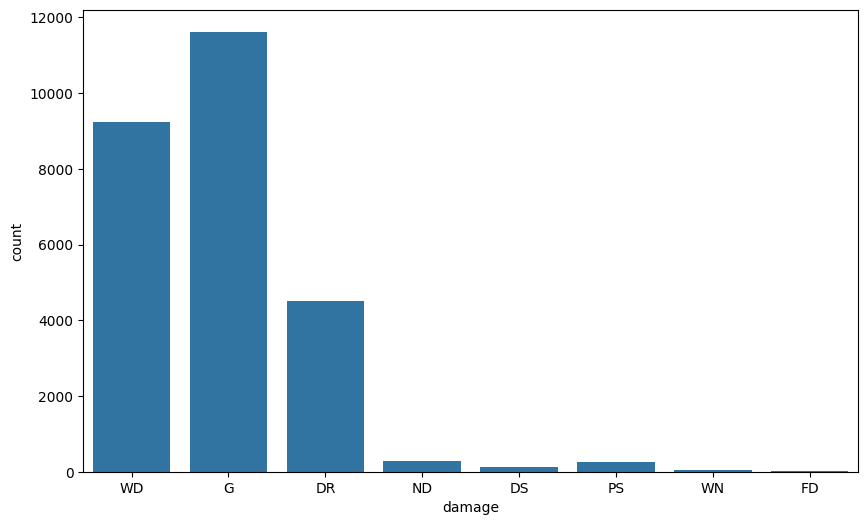

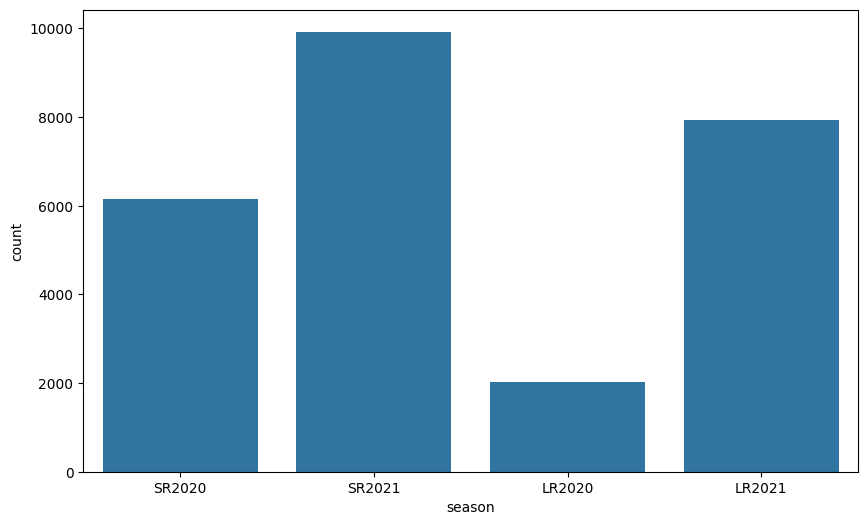

In [7]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=dataset)
    plt.show()

## Encoding categorical data

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformers_encoder_onehot = [
    ('encoder', OneHotEncoder(), categorical_features)
]
column_transformer = ColumnTransformer(transformers_encoder_onehot, remainder='passthrough')

In [9]:
dataset_encoded = column_transformer.fit_transform(dataset)
dataset = pd.DataFrame(dataset_encoded, columns=column_transformer.get_feature_names_out())

In [10]:
new_column_names = [col.replace('encoder__', '').replace('remainder__', '') for col in column_transformer.get_feature_names_out()]
dataset.columns = new_column_names

## Droping the ID column

In [11]:
dataset = dataset.drop(columns=['ID'])

In [12]:
dataset.head()

,growth_stage_F,growth_stage_M,growth_stage_S,growth_stage_V,damage_DR,damage_DS,damage_FD,damage_G,damage_ND,damage_PS,damage_WD,damage_WN,season_LR2020,season_LR2021,season_SR2020,season_SR2021,filename,extent
0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,L427F01330C01S03961Rp02052.jpg,0
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,L1083F00930C39S12674Ip.jpg,0
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,24_initial_1_1463_1463.JPG,0
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,L341F00167C01S00324Rp14178.jpg,60
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,L1084F02394C39S13931Ip.jpg,0
